In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
df = pd.read_csv("emails.csv")

In [11]:
df.head()


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [12]:
df.shape


(5172, 3002)

In [13]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
the,5172.0,6.640565,11.745009,0.0,0.0,3.0,8.0,210.0
to,5172.0,6.188128,9.534576,0.0,1.0,3.0,7.0,132.0
ect,5172.0,5.143852,14.101142,1.0,1.0,1.0,4.0,344.0
and,5172.0,3.075599,6.045970,0.0,0.0,1.0,3.0,89.0
for,5172.0,3.124710,4.680522,0.0,1.0,2.0,4.0,47.0
...,...,...,...,...,...,...,...,...
military,5172.0,0.006574,0.138908,0.0,0.0,0.0,0.0,4.0
allowing,5172.0,0.004060,0.072145,0.0,0.0,0.0,0.0,3.0
ff,5172.0,0.914733,2.780203,0.0,0.0,0.0,1.0,114.0
dry,5172.0,0.006961,0.098086,0.0,0.0,0.0,0.0,4.0


#h1"Without Upscaling"

In [14]:
df.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [52]:
df = df.drop("Email No.", axis=1)


In [53]:
df.isna().sum()


the           0
to            0
ect           0
and           0
for           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3001, dtype: int64

In [16]:
# Separate features (X) and label (y)
X = df.drop(columns=["Email No.", "Prediction"], axis=1)
Y = df["Prediction"]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [18]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
accuracy_values = []

In [19]:
for i in range(len(k_values)):
    model = KNeighborsClassifier(n_neighbors=k_values[i])
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

In [20]:
accuracy_values


[0.885024154589372,
 0.8657004830917875,
 0.863768115942029,
 0.8714975845410629,
 0.8608695652173913,
 0.8618357487922705,
 0.8608695652173913,
 0.8599033816425121,
 0.8608695652173913,
 0.8589371980676328,
 0.8531400966183574,
 0.855072463768116,
 0.8541062801932368,
 0.8541062801932368,
 0.8521739130434782]

In [24]:
optimal_k = -1
optimal_accuracy = -1
for i in list(zip(k_values,accuracy_values)):
    if(i[1]>optimal_accuracy):
        optimal_k=i[0]
        optimal_accuracy=i[1]

In [25]:
optimal_k,optimal_accuracy

(1, 0.885024154589372)

In [26]:
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)


In [27]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [28]:
y_pred = knn_model.predict(x_test)


In [32]:
cm=confusion_matrix(y_pred,y_test)

In [36]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       738
           1       0.76      0.87      0.81       297

    accuracy                           0.89      1035
   macro avg       0.85      0.88      0.86      1035
weighted avg       0.89      0.89      0.89      1035



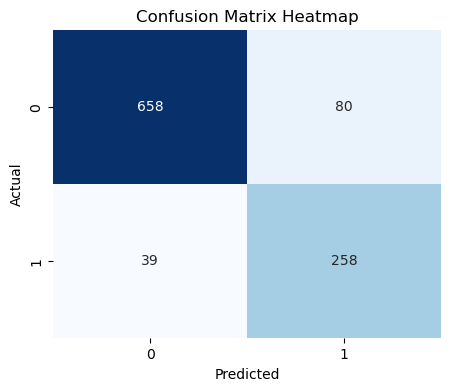

In [37]:
# Step 10 — Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [38]:
svm_model = SVC()

In [39]:
svm_model.fit(x_train, y_train)

SVC()

In [40]:
y_pred = svm_model.predict(x_test)

In [41]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87       738
           1       0.86      0.31      0.46       297

    accuracy                           0.79      1035
   macro avg       0.82      0.64      0.66      1035
weighted avg       0.80      0.79      0.75      1035



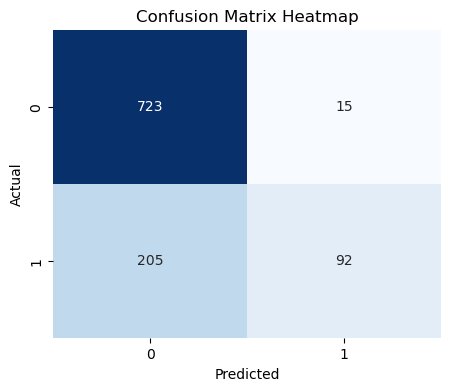

In [42]:
# Step 10 — Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()